### Parte 01 - Resolução do experimento do poço quadrado infinito

#### Dadas as seguintes condições ao poço.
#### A Energia Potencial é:
####                       V(x) = 0; se  0 < x < L
####                       V(x) = oo; se x < 0 e x > L

#### Para V(x) = 0, seleciona-se a Equação de Schroedinger, unidimensional e independente do tempo:
$$-\frac{\hbar^{2}}{2m}\frac{d^{2}}{dx^{2}}\psi(x)=E\psi(x)$$


#### Para a Equação acima, são soluções:
$$ \psi_n(x) = \sqrt{\frac{2}{L}} \sin\left(\frac{n\pi x}{L}\right)$$
$$E_n = \frac{n^2 \pi^2 \hbar^2}{2mL^2}$$

#### É objetivo desta Parte 01, determinar os coeficientes c, por meio da solução da seguinte integral:
$$c_n= \int_0^L \psi_n(x) \Psi(x,t=0) dx$$

#### O código da primeira parte

In [16]:
#Bibliotecas

import matplotlib.animation as animation
from IPython.display import HTML
import matplotlib.pyplot as plt
import scipy.integrate as spi        
import numpy as np
%matplotlib widget
%matplotlib inline



#### A primeira função de onda codificada é:
$$\Psi (x,0)=x\in\Big[0,\frac{L}{2}\Big]$$
$$\Psi (x,0)=x\in\Big[\frac{L}{2},L\Big]$$

In [3]:
## Para a energia -En- da particula:

def f(x,L):
    ener_p = np.sqrt(12./(L*L*L))
    return (np.piecewise(x,[x<L/2.,x>=L/2.],
                           [lambda x: ener_p*x,
                           lambda x: ener_p*(L-x)]))


In [21]:
## Para a função de onda da particula:

def psi_n(x,n,L):
    return (np.sqrt(2./L)*np.sin(n*x*np.pi/L))


#### O primeiro gráfico:

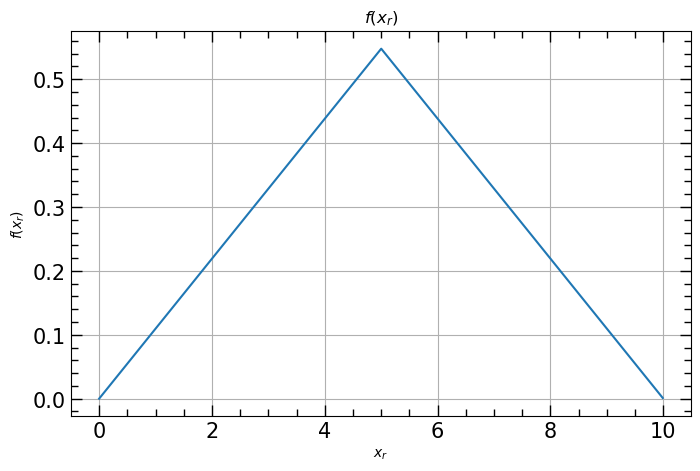

In [24]:
def opt_plot():
    plt.minorticks_on()
    plt.tick_params(axis='both',which='minor', direction = "in",
                    top = True,right = True, length=5,width=1,
                    labelsize=15)
    plt.tick_params(axis='both',which='major', direction = "in",
                    top = True,right = True, length=8,width=1,
                    labelsize=15)

x_r = np.arange(0,10,0.01)

plt.figure(figsize=(8,5))
plt.plot(x_r,f(x_r,10))
plt.title(r'$f(x_{r})$')
plt.xlabel(r'$x_{r}$')
plt.ylabel(r'$f(x_{r})$')
plt.grid()
opt_plot()

plt.savefig('f(x_r).png')

#### Calcula-se, agora, a constante c para um n específico:

In [26]:
def int_fun(x,n,L):
    return (f(x,L)*psi_n(x,n,L))

def c(n,L):
    if n==0 or n%2==0:  
        return (0)
    
    return (spi.quad(int_fun,0,L,args=(n,L),limit=100)[0])

#### A integração é feita até o ítem $c_{39}$ 

In [28]:
Nmax=40                  
L_1 = 10.               # Largura do poço.
L_step = 10./100.       
nl = np.array(range(Nmax))
cx = np.array([c(n,10.) for n in nl])

print(cx[0],cx[1],cx[2],cx[3],cx[4])
print(np.sum(cx*cx),cx[Nmax-1])

0.0 0.9927408002342286 0.0 -0.11030453335935887 0.0
0.9999974367055641 -0.0006526895465042513


#### Tendo encontrado um  padrão para resolução da constante $c_{n}$, é programada a primeira versão, ainda rústica, da função de onda dependente do tempo.
#### Para tal, admitem-se $m=1$ e $\hbar=1$, onde formula-se E=c
$$-\frac{\hbar^{2}}{2m}\frac{d^{2}}{dx^{2}}\psi(x)=E\psi(x) \ ->  -\frac{d^{}}{dx^{}}\psi(x)=\frac{2mc}{\hbar^{}}{dt}$$ 
$$resultando:$$
### $$\psi(t)=e^{\frac{-i\text{ E }t}{\hbar}}$$



In [30]:
def E(n,L):
    return(n*n*np.pi*np.pi/(2.*L*L))     

def psi_f(x,t,L):
    ener_p =np.sqrt(2/L)
    out = 0
    n_r = np.array(range(Nmax))
    out = cx*ener_p*np.sin(x*n_r*np.pi/L)*np.exp(-1.j*E(n_r,L)*t)
    s = np.sum(out)
    
    return(s)

#### Gráfico da parte real da função de onda. Ainda não normalizada.

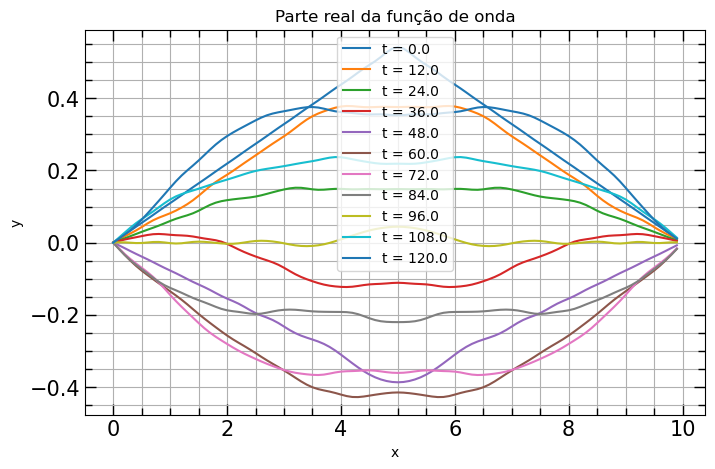

In [32]:
x_r = np.arange(0,10.,.1)
plts = []

plt.figure(figsize=(8,5))

for t in np.arange(0.,128.,12.):
    y_p = [np.real(psi_f(x,t,10.)) for x in x_r]
    pp = plt.plot(x_r,y_p,label="t = {}".format(t))
    plt.title("Parte real da função de onda")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.legend(loc = 'best')
    plt.grid(True,which='both')
    plts.append(pp)
    opt_plot()
    
    plt.savefig('Parte real da função de onda.png')